# Métodos Numéricos 

## Guía 3: Interpolación y aproximación polinomial (Abril 2022)

In [1]:
using Plots
using LaTeXStrings

### Problema 1

1. Usando los puntos interpolantes $x_0 = 0$, $x_1=0.6$ y $x_2=0.9$, construya analíticamente los polinomios interpolantes de Lagrange de grado 1 y 2 que aproximen las funciones
  
    **a.** $f(x) = \ln (x+1)$ y 
    
    **b.** $g(x) = \sqrt{x+1}$ 
    
    en $x=0.45$.

2. Encuentre los errores absolutos y relativos correspondientes.

3. En el rango dado $[x_0,x_2]$, grafique ambas funciones, sus polinomios interpolantes y correspondientes aproximaciones de Taylor de grado 2 entorno a $x_0$. Agregue al gráfico los puntos interpolantes $(x_i,f(x_i))$ (o $(x_i,g(x_i))$ según corresponda) usando símbolos en vez de curvas.

In [2]:
x0=0
x1=0.6
x2=0.9

0.9

In [3]:
L0(x)=((x-x1)/(x0-x1))*((x-x2)/(x0-x2))
L1(x)=((x-x0)/(x1-x0))*((x-x2)/(x1-x2))
L2(x)=((x-x0)/(x2-x0))*((x-x1)/(x2-x1))

L2 (generic function with 1 method)

In [4]:
f(x)=log(x+1)
g(x)=sqrt(x+1)

g (generic function with 1 method)

In [5]:
Pf(x)=L0(x)*f(x0)+L1(x)*f(x1)+L2(x)*f(x2)
Pg(x)=L0(x)*g(x0)+L1(x)*g(x1)+L2(x)*g(x2)

Pg (generic function with 1 method)

**Respuesta 1.2**

In [113]:
x=0.45

0.45

In [114]:
error_abs=abs(Pf(x)-f(x))

0.0032729450741291743

In [115]:
error_rel=abs(Pf(x)-f(x))/Pf(x)

0.008886854492591276

In [116]:
error_abs=abs(Pg(x)-g(x))

0.0007357296057144413

In [117]:
error_rel=abs(Pg(x)-g(x))/Pg(x)

0.0006113637187210456

**Respuesta 1.3**

In [6]:
Tf(x)=x-0.5*x^2
Tg(x)=1+0.5*x-1/8*x^2

Tg (generic function with 1 method)

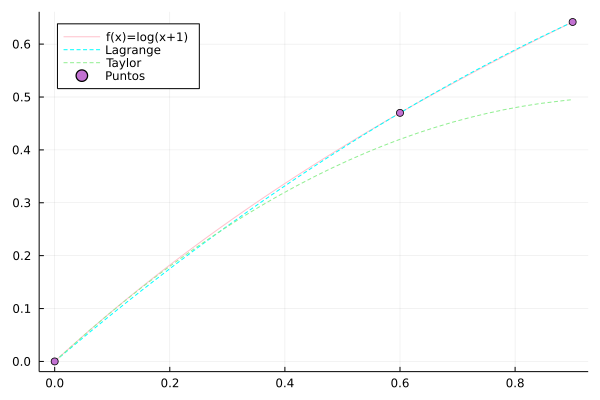

In [9]:
plot(x0:0.001:x2,f,linecolor=:pink,label="f(x)=log(x+1)",legend=:topleft)
plot!(Pf,linestyle=:dash,linecolor=:cyan,label="Lagrange")
plot!(Tf,linestyle=:dash,linecolor=:lightgreen,label="Taylor")
scatter!([x0,x1,x2],f,label="Puntos")

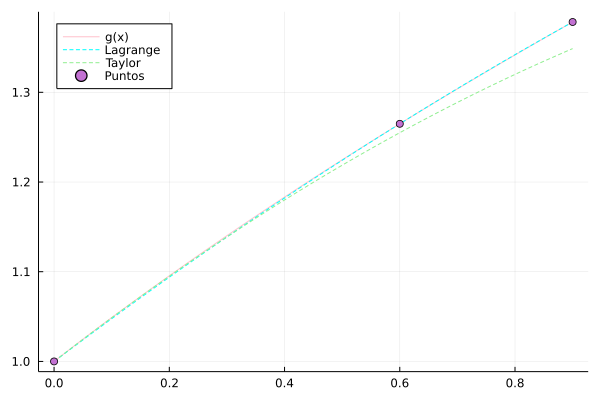

In [120]:
plot(x0:0.001:x2,g,linecolor=:pink,label="g(x)",legend=:topleft)
plot!(Pg,linestyle=:dash,linecolor=:cyan,label="Lagrange")
plot!(Tg,linestyle=:dash,linecolor=:lightgreen,label="Taylor")
scatter!([x0,x1,x2],g,label="Puntos")

### Problema 2

1. Escriba una función que evalúe el **polinomio interpolante de Lagrange** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: **i)** el valor $x$, **ii)** un arreglo $v$ de valores $x_i$ y **iii)** un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Para cada función del **Problema 1**, realice un gráfico de $P$ sobre $N=200$ puntos equidistantes en el intérvalo $[x_0,x_n]$ interpolando los puntos $(x_i,y_i) = (x_i,f(x_i))$ para $i=0,1,2$. Incluya en curvas punteadas la función y en símbolos para los puntos interpolantes. **Ayuda:** no confundir los $N$ puntos usados para graficar, con los $n$ puntos interpolación.

3. Gráfique la diferencia entre los polinomios y las funciones.

**1.**

In [2]:
"""
i-esimo polinomios de Lagrange
i perteneciente en {0,1,2,...,n}
x es argumento de Li(x)
Vx es un vector de componentes xi
"""
function Li(i,x,Vx)#Float64
    L=1.
    for j in 1:i-1
        L*=(x-Vx[j])/(Vx[j]-Vx[i])      ###  L=(x-Vx[j])/(Vx[j]-Vx[i])*L
    end
    for j in i+1:length(Vx)
        L*=(x-Vx[j])/(Vx[j]-Vx[i])
    end
    return L
end

Li

In [3]:
"""
Polinomio interpolante de Lagrange
x es argumento de P(x)
V es un vector de componentes xi
W es un vector de componentes yi
"""
function P(x,V,W)
    @assert length(V) == length(W)
    P=0.
    for i in 1:length(V)
        P += W[i]*Li(i,x,V)
    end
    return P
end

P

**2.**

In [85]:
f(x)=log(x+1)
g(x)=sqrt(x+1)
x0=0
x1=0.6
x2=0.9

0.9

In [90]:
V=[x0,x1,x2]
W=[f(x0),f(x1),f(x2)]

3-element Vector{Float64}:
 0.0
 0.47000362924573563
 0.6418538861723947

In [68]:
f.(V)

3-element Vector{Float64}:
 0.0
 0.47000362924573563
 0.6418538861723947

In [87]:
Pf(x) = P(x,V,f.(V))    ### f.(V) f aplicado en todas las componentes de V

Pf (generic function with 1 method)

In [126]:
Pg(x) = P(x,V,g.(V))

Pg (generic function with 1 method)

In [77]:
N=200
xrange=x0:(x2-x0)/(N-1):x2

0.0:0.004522613065326633:0.9

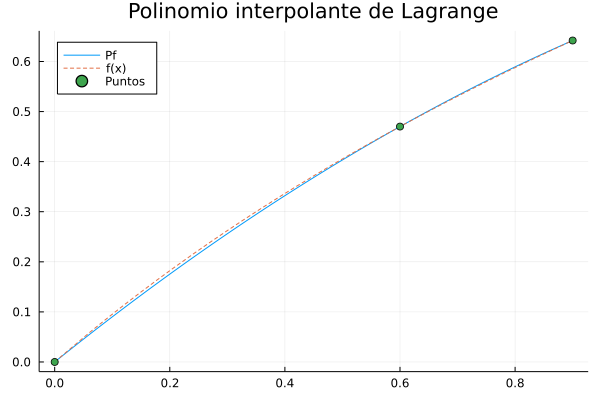

In [133]:
plot(xrange,Pf,title="Polinomio interpolante de Lagrange",label="Pf")
plot!(f,label="f(x)",linestyle=:dash)
scatter!(V,f.(V),label="Puntos",legend=:topleft)

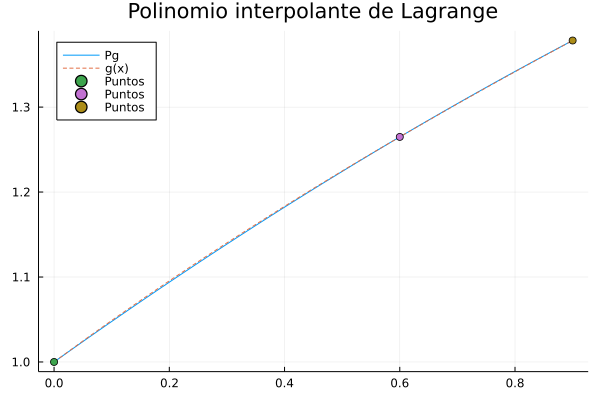

In [137]:
plot(xrange,Pg,title="Polinomio interpolante de Lagrange",label="Pg")
plot!(g,label="g(x)",linestyle=:dash)
scatter!([x0 x1 x2],g,label="Puntos",legend=:topleft)

**3.**

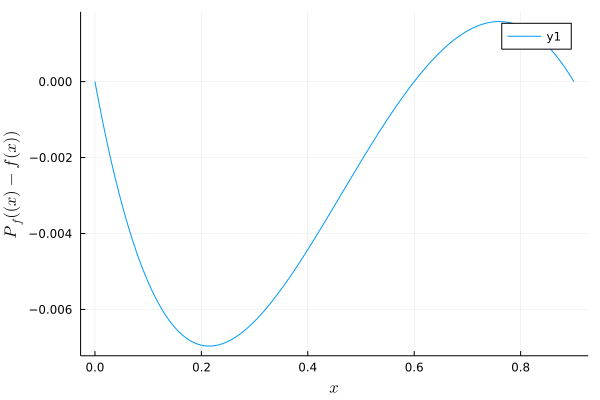

In [155]:
plot(xrange,x->Pf(x)-f(x))
plot!(xlabel=L"x",ylabel=L"P_f((x)-f(x))",label="")

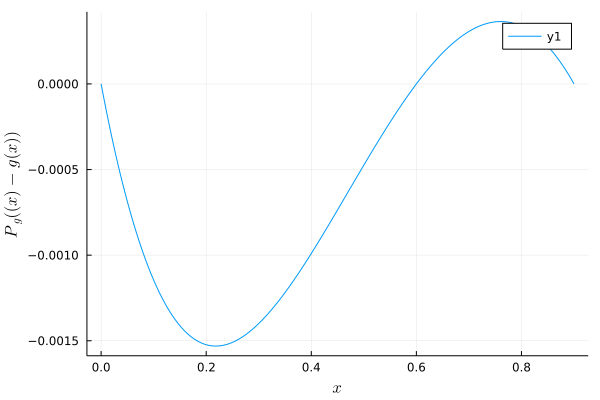

In [156]:
plot(xrange,x->Pg(x)-g(x))
plot!(xlabel=L"x",ylabel=L"P_g((x)-g(x))",label="")

### Problema 3

Se desea aproximar $\cos(x)$ en el intervalo $[0,1]$ con un error absoluto menor a $1\times 10^{-7}$ para todo $x \in [0,1]$. 

1. Usando el teorema del error de la interpolación polinomial, estime el número de puntos de interpolación que son necesarios para conseguir el máximo error absoluto mencionado.

2. Grafique el error absoluto en el intervalo en cuestión para tres casos particulares de $\{x_i\}$: *i)* puntos equidistantes $x_i=i/n$, **ii)** puntos al azar y **iii)** puntos distribuidos heterogéneamente $x_i=1/i$.

**3.1**

In [41]:
#hline(0)
tol=1e-7
for n=1:100
    e=1/factorial(n+1)              ### Error absoluto
    println("n=$n, 1/(n+1)!=$e")
    if e<=tol
        return print("n=$n para obtener la precisión requerida")
    end
end

n=1, 1/(n+1)!=0.5
n=2, 1/(n+1)!=0.16666666666666666
n=3, 1/(n+1)!=0.041666666666666664
n=4, 1/(n+1)!=0.008333333333333333
n=5, 1/(n+1)!=0.001388888888888889
n=6, 1/(n+1)!=0.0001984126984126984
n=7, 1/(n+1)!=2.48015873015873e-5
n=8, 1/(n+1)!=2.7557319223985893e-6
n=9, 1/(n+1)!=2.755731922398589e-7
n=10, 1/(n+1)!=2.505210838544172e-8
n=10 para obtener la precisión requerida

**3.2** 
*Caso {xi}/ xi=i/n puntos equidistantes*

*Si los xi estan equiespaciados tnenemos que:*

$E_n(x)$<=1/(4(n+1)*n^(n+1))

In [51]:
tol=1e-7
for n=1:100
    e=1/1/(4(n+1)*n^(n+1))            ### Error absoluto
    println("n=$n, E_n=$e")
    if e<=tol
        return print("n=$n para obtener la precisión requerida")
    end
end

n=1, E_n=0.125
n=2, E_n=0.010416666666666666
n=3, E_n=0.0007716049382716049
n=4, E_n=4.8828125e-5
n=5, E_n=2.666666666666667e-6
n=6, E_n=1.2758018159252726e-7
n=7, E_n=5.420828923669698e-9
n=7 para obtener la precisión requerida

In [7]:
f(x)=cos(x)
n=6
V=[(i)/n for i=0:n]

7-element Vector{Float64}:
 0.0
 0.16666666666666666
 0.3333333333333333
 0.5
 0.6666666666666666
 0.8333333333333334
 1.0

In [8]:
P_f(x)=P(x,V,f.(V))
E(x)=abs(cos(x)-P_f(x))

E (generic function with 1 method)

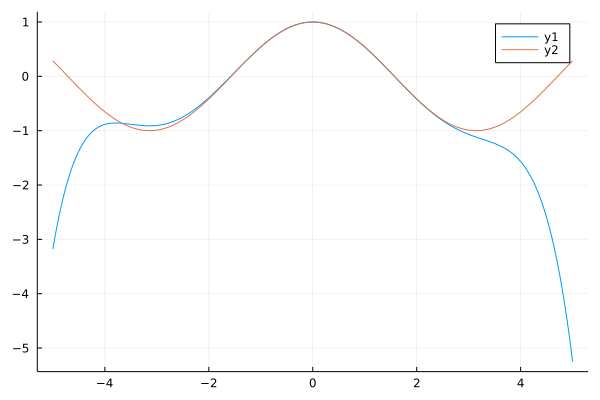

In [9]:
plot(P_f)
plot!(cos)

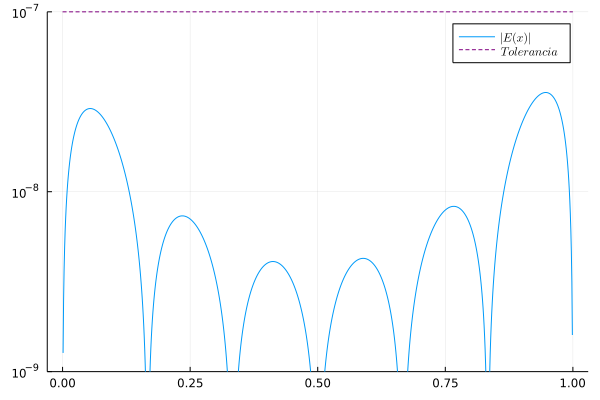

In [232]:
tol=1e-7
plot(0:0.001:1,E,label=L"|E(x)|")
plot!(x->tol,
    label=L"Tolerancia",
    linestyle=:dash,
    yscale=:log10,
    linecolor=:purple,
    ylim=(tol/100,tol))

In [18]:
f(x)=cos(x)
n=10
V=sort(rand(n))              ### rand() retorna números entre 0 y 1 al azar

10-element Vector{Float64}:
 0.15913637761438393
 0.26802107154054433
 0.46237095780814885
 0.48386526464636526
 0.508439885517121
 0.5102450775167805
 0.6625553778462543
 0.6865217138473412
 0.8107480155485681
 0.9259134961315911

*Caso {xi}/ xi sean punos al azar*

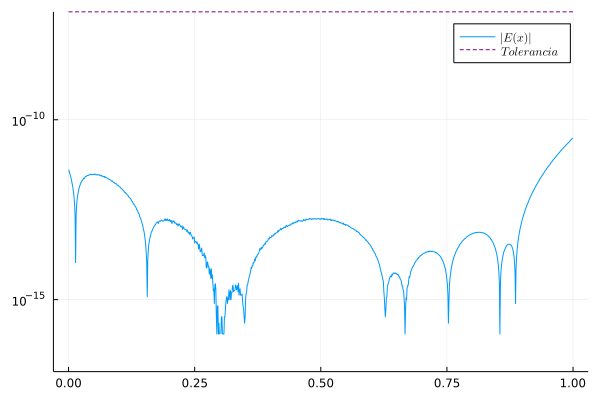

In [57]:
n=10
V=sort(rand(n))

P_f(x)=-P(x,V,f.(V))
E(x)=abs(cos(x)-P_f(x))

tol=1e-7
plot(0:0.001:1,E,label=L"|E(x)|")
plot!(x->tol,
    label=L"Tolerancia",
    linestyle=:dash,
    yscale=:log10,
    linecolor=:purple,
    ylim=(tol/10000000000,tol))

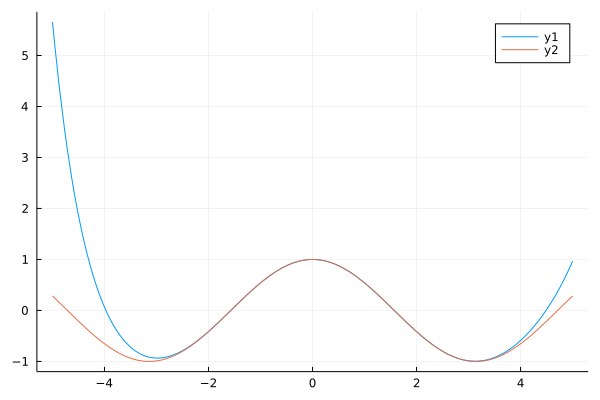

In [31]:
plot(P_f)
plot!(cos)

*Caso {xi}/ xi=1/i distribuidos heterogeniamente*

### Problema 4

Construya analíticamente el polinomio interpolante de Newton para las siguientes funciones. 
De una cota del error absoluto en el intervalo $[x_0,x_n]$.

**a.** $f(x) = \exp (2x) \cos(3x)$ para $x_0=0$, $x_1=0.3$ y $x_2=0.6$.

**b.** $g(x) = \ln(x)$ para $x_0=1$, $x_1=1.1$, $x_2=1.3$ y $x_3=1.4$.

In [282]:
x0=0
x1=0.3
x2=0.6
f(x)=exp(2x)cos(3x)

f (generic function with 1 method)

y la definición de los coeficientes del polinomio $P_n(x)$ serán

\begin{align}
a_0 &= f[x_0]    \\
a_1 &= f[x_1, x_0]    \\
a_2 &= f[x_2, x_1, x_0]    \\
\cdots \quad &= \quad \cdots \\
a_{n-1} &= f[x_{n-1}, x_{n-2}, \cdots, x_1, x_0] \\
a_n &= f[x_n, x_{n-1}, \cdots, x_1, x_0] 
\end{align}


<p style="border: ridge #0000FF 2px;">
\begin{align}
f[x_i]  &=  f(x_i) \\
f[x_i, x_{i-1}]  &=  \frac{f[x_i]-f[x_{i-1}]}{(x_i - x_{i-1})} \\
f[x_i, x_{i-1}, x_{i-2}]  &=   \frac{f[x_i,x_{i-1}]-f[x_{i-1}, x_{i-2}]}{(x_i - x_{i-2})} \\
\cdots \quad &= \quad \cdots \\
f[x_{n-1}, x_{n-2}, \cdots, x_1, x_0]  &= \frac{f[x_{n-1},x_{n-2},..., x_1]-f[x_{n-2}, x_{n-3}, ...,x_0]}{(x_{n-1} - x_0)} \\ 
f[x_n, x_{n-1}, \cdots, x_1, x_0]  &= \frac{f[x_n,x_{n-1},..., x_1]-f[x_{n-1}, x_{n-2}, ...,x_0]}{(x_n - x_0)}
\end{align}
</p>    

In [283]:
fx0 = f(x0)
fx1 = f(x1)
fx2 = f(x2)
a0 = fx0
fx1x0 = (fx1-fx0)/(x1-x0) 
fx2x1 = (fx2-fx1)/(x2-x1) 
a1 = fx1x0
a2 = (fx2x1-fx1x0)/(x2-x0)
P2(x) = a0+a1*(x-x0)+a2*(x-x0)*(x-x1)

P2 (generic function with 1 method)

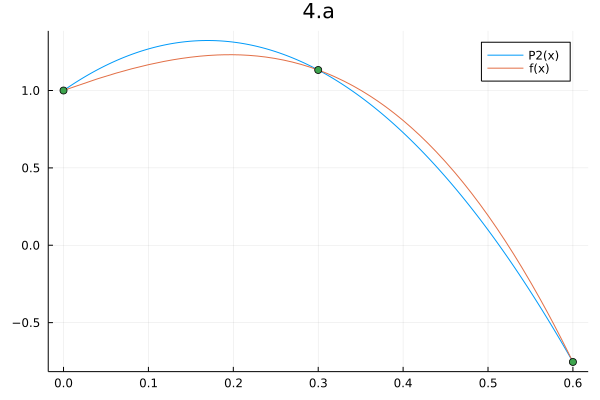

In [284]:
plot(x0:0.001:x2,P2,label="P2(x)",title="4.a")
plot!(f,label="f(x)")
scatter!([x0,x1,x2],P2,label="")

In [273]:
x0=1
x1=1.1
x2=1.3
x3=1.4
g(x)=log(x)

g (generic function with 1 method)

In [274]:
gx0 = g(x0)
gx1 = g(x1)
gx2 = g(x2)
gx3 = g(x3)
a0 = gx0
gx1x0 = (gx1-gx0)/(x1-x0) 
gx2x1 = (gx2-gx1)/(x2-x1) 
gx3x2 = (gx3-gx2)/(x3-x2) 
a1 = gx1x0
gx2x1x0 = (gx2x1-gx1x0)/(x2-x0)
gx3x2x1 = (gx3x2-gx2x1)/(x3-x1)
a2 = (gx2x1-gx1x0)/(x2-x0)
a3 = (gx3x2x1-gx2x1x0)/(x3-x0)
P3(x) = a0+a1*(x-x0)+a2*(x-x0)*(x-x1)+a3*(x-x0)*(x-x1)*(x-x2)

P3 (generic function with 1 method)

In [275]:
s = (a0, a1, a2, a3)

(0.0, 0.9531017980432485, -0.39277124909139216, 0.19700560790671803)

In [276]:
P3(0.45)

-0.7244867895766133

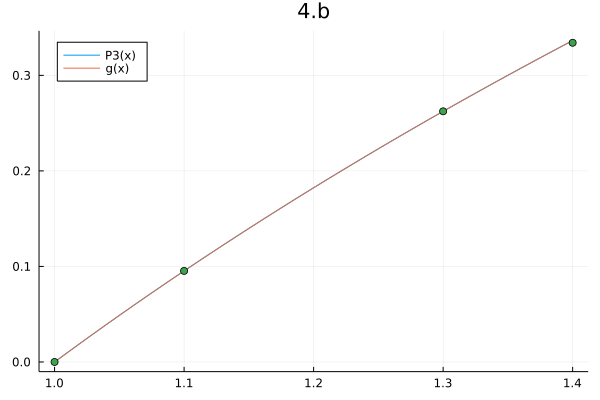

In [279]:
plot(x0:0.01:x3,P3,label="P3(x)",title="4.b")
plot!(g,label="g(x)")
scatter!([x0,x1,x2,x3],P2,label="")
plot!(legend=:topleft)

### Problema 5

1. Escriba una función que evalúe el **polinomio interpolante de Netwon** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: **i)** el valor $x$, **ii)** un arreglo $v$ de valores $x_i$ y **iii)** un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Grafique los polinomios interpolantes de Newton para las funciones del **problema 4** en $N=200$ puntos equidistantes en el intervalo $[x_0,x_n]$ correspondiente. Incluya en el grafico las curvas de las funciones y, con símbolos, los puntos de interpolación.

3. Repita 1. y 2. pero usando puntos de interpolación determinados por $n=80$ valores equidistantes de $x_i$ en $[0,0.6]$ para $f$ y $[1,1.4]$ para $g$.

4. Repita 3. pero usando `BigFloat` en vez de `Float64`.

5. Interprete lo observado.

In [289]:
f(x)=log(x)
V = [1.,1.1,1.3,1.4]
W = [f.(V[i]) for i in 1:4]

4-element Vector{Float64}:
 0.0
 0.09531017980432493
 0.26236426446749106
 0.3364722366212129

In [41]:
length(V)
#x = [rand(10)]

4

In [291]:
function Polinomio_Newton(x,V,W)
    @assert length(V) == length(W)
    n = length(V)
    Fxx = zeros(n)
    a = zeros(n)
    a[1] = W[1]
    P = a[1]
    Q = 1.
    U = [W[i] for i in 1:n]
    for j in 1:n-1
        for i in 1:n-j
            Fxx[i] = (U[i+1]-U[i])/(V[i+j]-V[i])     ### V = [x0,x1,x2,...,xn] , W = [y0,y1,y2,...,yn]
            U[i] = Fxx[i]                              ### Uj[i] = [y_i - y_i-1]/(x_i - x_i-)                          
        end
        a[j+1] = U[1]
    end
    for k in 1:n-1
        Q *= (x-V[k])
        P += a[k+1]*Q
    end
    return P
end

Polinomio_Newton (generic function with 1 method)

In [292]:
Polinomio_Newton(0.45,V,W)

-0.7244867895766133

In [300]:
"Polinomio interpolante Newton"
function P(x,V,W)
    @assert length(V) == length(W)
    n = length(V)
    Z = deepcopy(W)                    ### Z = [W[i] for i in 1:n]
    for i=2:n                       ### for i i in 2:n    
        for j=n:-1:i
            Z[j] = (Z[j]-Z[j-1])/(V[j]-V[j-i+1])     
        end
    end
    r = Z[n]                        ### Algoritmo de Horner
    for i=n-1:-1:1 
        r = Z[i]+(x-V[i])*r
    end
    return r
end

P

In [302]:
Polinomio_Newton(0.45,V,W)

-0.7244867895766135

In [306]:
?BigFloat

search: BigFloat



```
BigFloat <: AbstractFloat
```

Arbitrary precision floating point number type.

---

```
BigFloat(x::Union{Real, AbstractString} [, rounding::RoundingMode=rounding(BigFloat)]; [precision::Integer=precision(BigFloat)])
```

Create an arbitrary precision floating point number from `x`, with precision `precision`. The `rounding` argument specifies the direction in which the result should be rounded if the conversion cannot be done exactly. If not provided, these are set by the current global values.

`BigFloat(x::Real)` is the same as `convert(BigFloat,x)`, except if `x` itself is already `BigFloat`, in which case it will return a value with the precision set to the current global precision; `convert` will always return `x`.

`BigFloat(x::AbstractString)` is identical to [`parse`](@ref). This is provided for convenience since decimal literals are converted to `Float64` when parsed, so `BigFloat(2.1)` may not yield what you expect.

See also:

  * [`@big_str`](@ref)
  * [`rounding`](@ref) and [`setrounding`](@ref)
  * [`precision`](@ref) and [`setprecision`](@ref)

!!! compat "Julia 1.1"
    `precision` as a keyword argument requires at least Julia 1.1. In Julia 1.0 `precision` is the second positional argument (`BigFloat(x, precision)`).


# Examples

```jldoctest
julia> BigFloat(2.1) # 2.1 here is a Float64
2.100000000000000088817841970012523233890533447265625

julia> BigFloat("2.1") # the closest BigFloat to 2.1
2.099999999999999999999999999999999999999999999999999999999999999999999999999986

julia> BigFloat("2.1", RoundUp)
2.100000000000000000000000000000000000000000000000000000000000000000000000000021

julia> BigFloat("2.1", RoundUp, precision=128)
2.100000000000000000000000000000000000007
```


### Problema 6

Considere la función definida por $f(x) = \frac{1}{1 + 25 x^2}$.

1. Grafique la función $f$ en el intervalo $[-1,1]$.

Para cada valor de $n\in \{5, 10, 20\}$:

2. Calcule la interpolación de $f$ por el **método de Lagrange** usando $n+1$ valores equidistantes de $x$ en el intervalo mencionado.

3. Añada al gráfico una curva del polinomio interpolante evaluandolo en 200 puntos equidistantes en los rangos $x=[-1,1]$ e $y=[-1.5,1.5]$.

4. Calcule el error máximo para cada caso e incluya estos datos de errores máximos en el gráfico.

**Nota:** En este problema se observa el llamado fenómeno de Runge, en el que la interpolación
por polinomios usando puntos equiespaciados da resultados divergentes.

5. ¿Por qué no hay contradicción con el teorema de aproximación de Weierstrass?

6. En vez de puntos equiespaciados, pruebe usando el espaciamiento de Chebyshev dado por $ x_i = -\cos( \pi (i-1)/n )$, para $i=1,2,...,n+1$. ¿Disminuye significativamente el error en este caso?

## Ejercicios Complementarios

### Problema C.1

Considere el siguiente polinomio:
$$
p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5 \ ,
$$

1. Grafíquelo y observe que posee una única raíz real positiva.

2. Calcule a mano su derivada y grafíquela.

3. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner. Grafique nuevamente comparando con las versiones anteriores.

4. Encuentre la raíz del polinomo utilizando el método de Newton-Raphson, eligiendo el valor inicial $p_1$ utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces.

### Problema C.2: Error  de la interpolación polinomial para puntos equiespaciados

Usando el teorema dado en el teórico, demuestre el siguiente corolario.

**Corolario:** Sea $f \varepsilon C_{[a,b]}^{(n+1)}$  tal que $\exists M>0 / |f^{(n+1)}(x) |< M \;\forall \,x\varepsilon [a,b]$ (i.e. su $n+1$-ésima derivada es acotada en $[a,b]$). Sea $x_i=a + i \;; i=0,\cdots,n$ donde $ h=(b-a)/n$. Sea $P_n$ es el polinomio de grado $n$ interpolante a $f$ en los puntos $x_i$ (i.e. $P_n(x_i)=f(x_i)\;,i=0,\cdots ,n$). Entonces, $\forall\;x\varepsilon [a,b]$ se tiene
$$
\left| f(x) - P_n(x)\right | \leq \frac{M}{4 (n+1)}\;\left(\frac{b-a}{n}\right)^{n+1}
$$